# Shapeファイルを使ってより高解像度な海岸線を描く

## 主に必要なライブラリー
GeopandasとCartopyとmatplotlibです。

## shapeファイルのダウンロード先
ポリゴンである必要があります。[ここ](https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v2_3.html)からDLします（全国版で良いと思う）。

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

PATH_COASTLINE = "shp/N03-190101_GML/N03-19_190101.shp"

In [2]:
gdata = gpd.read_file("shp/N03-190101_GML/N03-19_190101.shp")
gdata_extracted = gdata[
    (gdata["N03_001"] == "東京都")
    | (gdata["N03_001"] == "千葉県")
    | (gdata["N03_001"] == "埼玉県")
    | (gdata["N03_001"] == "神奈川県")
    | (gdata["N03_001"] == "山梨県")
    | (gdata["N03_001"] == "茨城県")
    | (gdata["N03_001"] == "栃木県")
    | (gdata["N03_001"] == "群馬県")
]

<GeoAxes: >

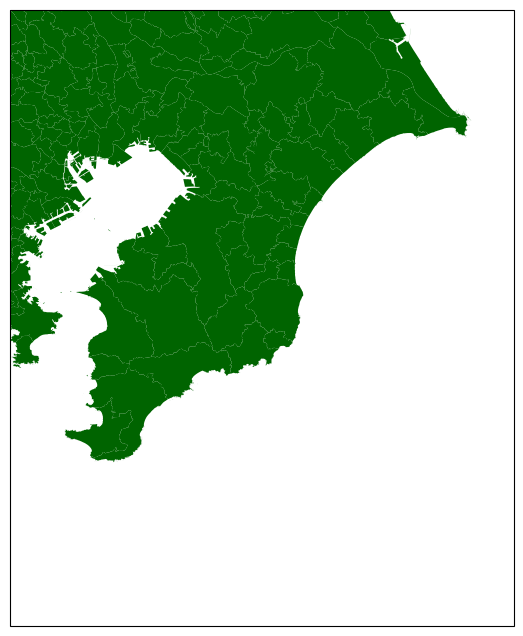

In [3]:
plt.figure(figsize=(12, 8), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([139.6, 141, 34.5, 36.0])
# ax.coastlines(resolution="10m", lw=1.0, zorder=3, color="k", facecolor=(0, 1, 0))
gdata_extracted.plot(ax=ax, color="darkgreen")

## 地域をマージして県境を消す

In [4]:
gdata_extracted_union = gdata_extracted.unary_union
merged = gpd.GeoSeries(gdata_extracted_union)

<GeoAxes: >

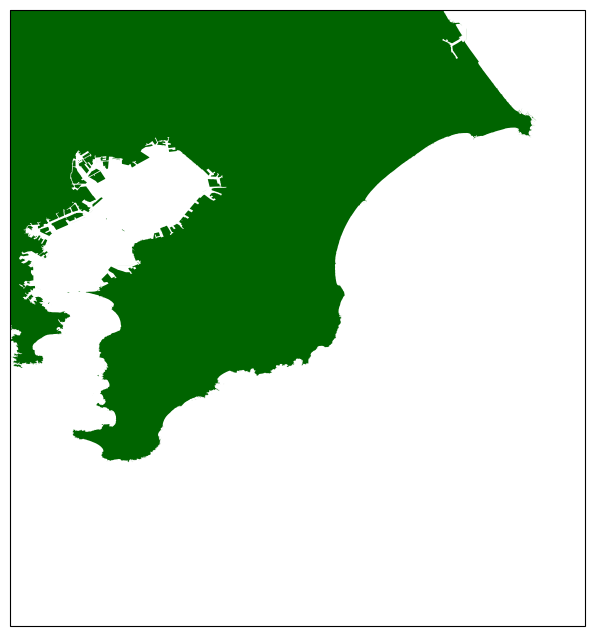

In [5]:
plt.figure(figsize=(12, 8), dpi=100)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([139.6, 141, 34.5, 36.0])
# ax.coastlines(resolution="10m", lw=1.0, zorder=3, color="k", facecolor=(0, 1, 0))
merged.plot(ax=ax, color="darkgreen")